<h1 align="center">Spotify Data Analysis using Python - Project</h1>

<h3 align="right">By - <a>Gangadhar Reddy Nagella</a></h3>

Dataset:
https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db

#### Import `tracks.csv` dataset and necessary libraries

* id: unique identifier for each track used by Spotify (randomly generated alphanumeric string)  
* name: track name  
* popularity: song popularity score as of March 2021 on a normalized scale [0-100] where 100 is the most popular  
* duration_ms: duration of track in milliseconds  
* explicit: true or false if the song contains explicit content.  
* artists: name of the main artist  
* id_artists: unique identifier for each artist used by Spotify  
* release_date: when the album was released (date format: yyyy/mm/dd)  
* danceability: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.  
* energy: measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.  
* key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is set to -1.  
* loudness: The overall loudness of a track in decibels (dB). Values typical range between -60 and 0 db.  
* mode: Mode indicates the modality (major=1 or minor=0) of a track, the type of scale from which its melodic content is derived.  
* speechiness: measures from 0.0 to 1.0 and detects the presence of spoken words in a track. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.  
* acousticness: confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic  
* instrumentalness: measure from 0.0 to 1.0 and represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.  
* liveness: likelihood measure from 0.0 to 1.0 and indicates the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.  
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.  
* tempo: The overall estimated tempo of a track in beats per minute (BPM)  
* time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).  ach bar (or measure).h bar (or measure).

#### Importing Datasets

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [32]:
# Reading Data Set 
df_tracks = pd.read_csv(r'C:\Users\user\Desktop/tracks.csv')

#### Check Structure of `df_tracks` dataframe

In [33]:
# check head to dataframe
df_tracks.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [34]:
# an overview of features and their dtypes
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

from this output of info() method we understand that:  
- There are __9__ Features with `float` dtype
- There are __6__ Features with `int` dtype
- There are __5__ Features with `object` dtype

In [35]:
df_tracks.shape

(586672, 20)

In [36]:
# check total number of null values in df_tracks
df_tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

- there are 71 missing values on `name` column

In [37]:
# check if dataframe has duplicated rows
df_tracks.duplicated().sum()

0

In [38]:
# df_tracks.describe()
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


- `popularity` has mean of 27 and it is skewed to left which shows that mosts songs are unpopular.
- `loudness` has negative values.
- `speechiness`, `instrumentalness`, `liveness` are skewed to left.
- `duration_ms` has large numbers and its better to convert its unit to seconds. 

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'explicit'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >]],
      dtype=object)

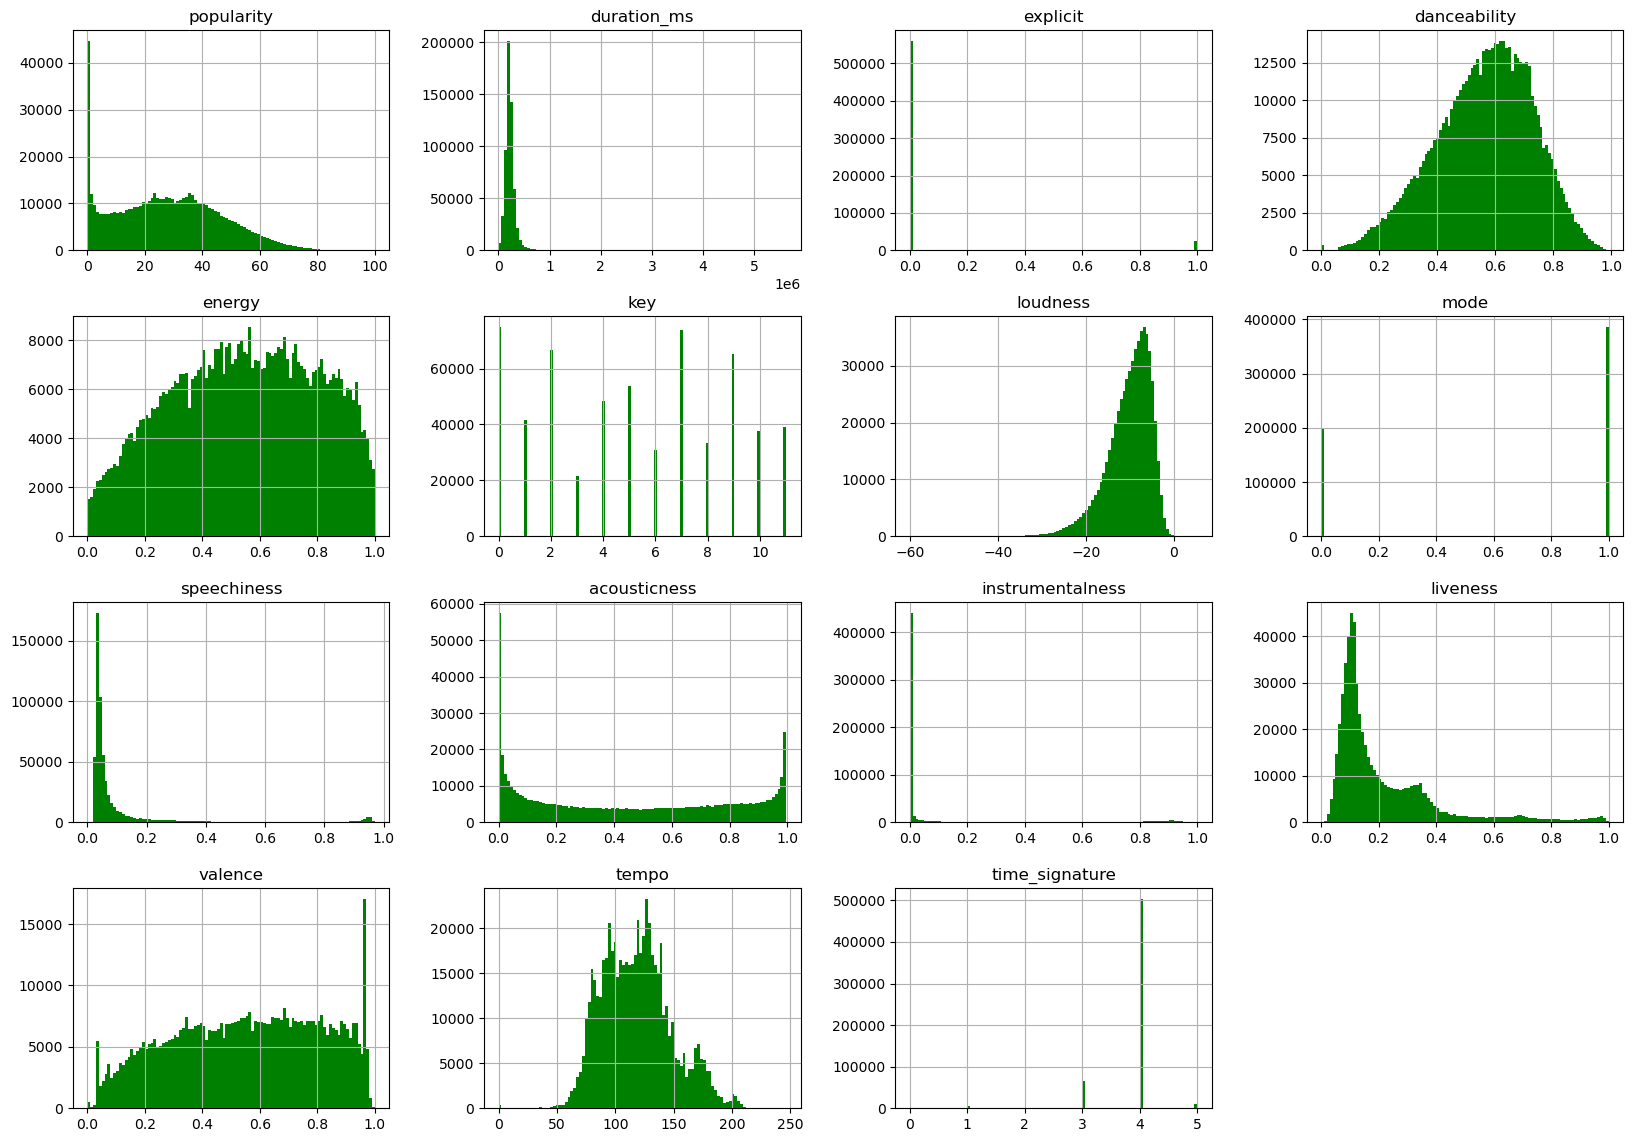

In [39]:
# check distribution of df_tracks
df_tracks.hist(bins = 100, color = 'green', figsize = (20, 14))

#### Check categorical featuires

In [40]:
# create a new df for cateforical features only
category_df = df_tracks.select_dtypes(include = 'object')

In [41]:
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            586672 non-null  object
 1   name          586601 non-null  object
 2   artists       586672 non-null  object
 3   id_artists    586672 non-null  object
 4   release_date  586672 non-null  object
dtypes: object(5)
memory usage: 22.4+ MB


#### Check values of each categorical features

In [42]:
for col in category_df.columns:
    print(f"{col} : Has {category_df[col].nunique()} Unique Values")

id : Has 586672 Unique Values
name : Has 446474 Unique Values
artists : Has 114030 Unique Values
id_artists : Has 115062 Unique Values
release_date : Has 19700 Unique Values


### Data Cleaning

___Renaming `name` column to `track_name` for better understanding of its nature___

In [43]:
df_tracks.rename(columns={'name' : 'track_name'}, inplace = True)

#### `duration_ms` Column

___We will convert songs duration unit to seconds and renaming its column to `duration`___

In [44]:
df_tracks['duration_ms'] = df_tracks['duration_ms'].apply(lambda x: round(x/1000))

In [45]:
df_tracks.rename(columns = {'duration_ms': 'duration'}, inplace = True)

In [46]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   track_name        586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration          586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [47]:
#df_tracks['explicit'].plot(kind = 'bar')

In [48]:
df_tracks['explicit'] = df_tracks['explicit'].astype('category')

#### `artist` Column

In [49]:
df_tracks['artists'][0:10]

0                ['Uli']
1    ['Fernando Pessoa']
2    ['Ignacio Corsini']
3    ['Ignacio Corsini']
4        ['Dick Haymes']
5        ['Dick Haymes']
6      ['Francis Marty']
7        ['Mistinguett']
8        ['Greg Fieler']
9    ['Ignacio Corsini']
Name: artists, dtype: object

___In the "artists" column of the DataFrame, the artist names are currently represented as strings with square brackets around them.To clean up this representation, we want to extract the actual artist names and remove the square brackets___

In [50]:
df_tracks['artists'] = df_tracks['artists'].str.strip("[]").str.replace("'", "")

In [51]:
df_tracks['artists'][0:10] 

0                Uli
1    Fernando Pessoa
2    Ignacio Corsini
3    Ignacio Corsini
4        Dick Haymes
5        Dick Haymes
6      Francis Marty
7        Mistinguett
8        Greg Fieler
9    Ignacio Corsini
Name: artists, dtype: object

#### `release_date` Column

In [52]:
df_tracks['release_date'][:20] # to display the 20 first rows for better undestanding to its values.

0     1922-02-22
1     1922-06-01
2     1922-03-21
3     1922-03-21
4           1922
5           1922
6           1922
7           1922
8           1922
9     1922-03-29
10    1922-06-01
11    1922-06-01
12    1922-02-22
13          1922
14          1922
15    1922-06-01
16    1922-06-01
17    1922-06-01
18          1922
19    1922-03-21
Name: release_date, dtype: object

In [53]:
# change dtype to datetime
df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date'], format = 'mixed')

In [54]:
df_tracks['release_date'][:20] # to check whether converting is done correctly.

0    1922-02-22
1    1922-06-01
2    1922-03-21
3    1922-03-21
4    1922-01-01
5    1922-01-01
6    1922-01-01
7    1922-01-01
8    1922-01-01
9    1922-03-29
10   1922-06-01
11   1922-06-01
12   1922-02-22
13   1922-01-01
14   1922-01-01
15   1922-06-01
16   1922-06-01
17   1922-06-01
18   1922-01-01
19   1922-03-21
Name: release_date, dtype: datetime64[ns]

### `df_tracks` Analysis

#### Popular Artists

In [55]:
plt.figure(figsize = (20, 14))

def visualize_word_counts(counts):
    wc = WordCloud(max_font_size=130, min_font_size=25, colormap='tab20', background_color='white', prefer_horizontal=.95, width=2100, height=700, random_state=0)
    cloud = wc.generate_from_frequencies(counts)
    plt.figure(figsize=(18,15))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

<Figure size 2000x1400 with 0 Axes>

In [56]:
# create a new df for top 20 artists in aspect of their number of songs
top_artist = df_tracks['artists'].value_counts().head(20)


In [57]:
top_artist

artists
Die drei ???                          3856
TKKG Retro-Archiv                     2006
Benjamin Blümchen                     1503
Bibi Blocksberg                       1472
Lata Mangeshkar                       1373
Bibi und Tina                          927
Tintin, Tomas Bolme, Bert-Åke Varg     905
Francisco Canaro                       891
Ella Fitzgerald                        870
Tadeusz Dolega Mostowicz               838
Fünf Freunde                           812
Mohammed Rafi                          787
Queen                                  777
Frank Sinatra                          680
Elvis Presley                          680
The Rolling Stones                     654
Die Originale                          638
Billie Holiday                         609
Julio Iglesias                         595
Globi                                  584
Name: count, dtype: int64

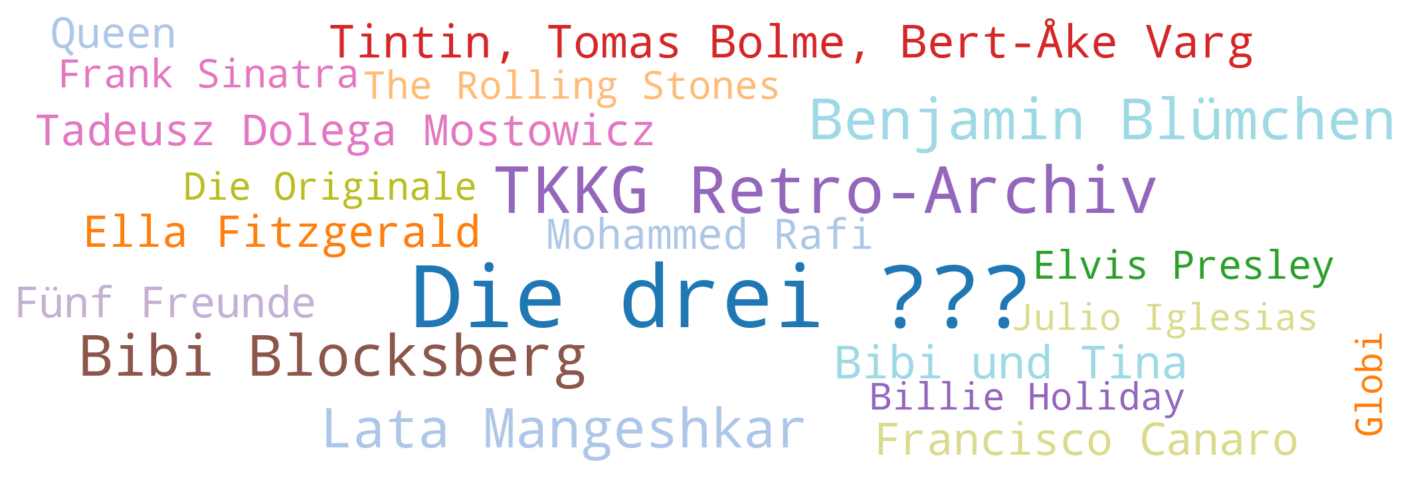

In [58]:
visualize_word_counts(top_artist)


#### `top_artists` on barplot

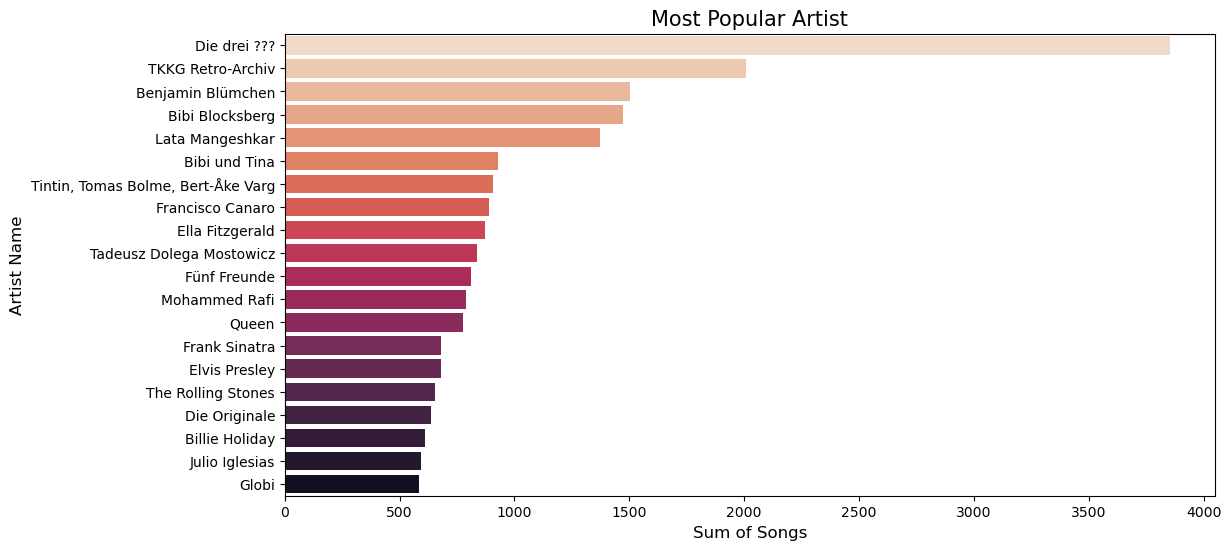

In [59]:
fig, ax = plt.subplots(figsize = (12, 6))
ax = sns.barplot(x = top_artist.values, y=top_artist.index, palette='rocket_r')
ax.set_xlabel("Sum of Songs", fontsize = 12)
ax.set_ylabel('Artist Name', fontsize = 12)
ax.set_title("Most Popular Artist", c = 'black', fontsize = 15)
plt.show()

In [60]:
def popularity(overall, n):
    #n: represents number of rows shown
    return df_tracks.query(f'popularity > {overall}')[['track_name', 'popularity', 'artists', 'release_date']].sort_values(by = 'popularity', ascending = False).reset_index(drop=-1).head(n)

In [61]:
popularity(90, 5)

,track_name,popularity,artists,release_date
0,Peaches (feat. Daniel Caesar & Giveon),100,"Justin Bieber, Daniel Caesar, Giveon",2021-03-19
1,drivers license,99,Olivia Rodrigo,2021-01-08
2,Astronaut In The Ocean,98,Masked Wolf,2021-01-06
3,Save Your Tears,97,The Weeknd,2020-03-20
4,telepatía,97,Kali Uchis,2020-12-04


In [62]:
top_songs = popularity(90, 20)[['track_name', 'popularity']]

In [63]:
top_songs

,track_name,popularity
0,Peaches (feat. Daniel Caesar & Giveon),100
1,drivers license,99
2,Astronaut In The Ocean,98
3,Save Your Tears,97
4,telepatía,97
5,Blinding Lights,96
6,Leave The Door Open,96
7,The Business,95
8,Streets,94
9,Heartbreak Anniversary,94


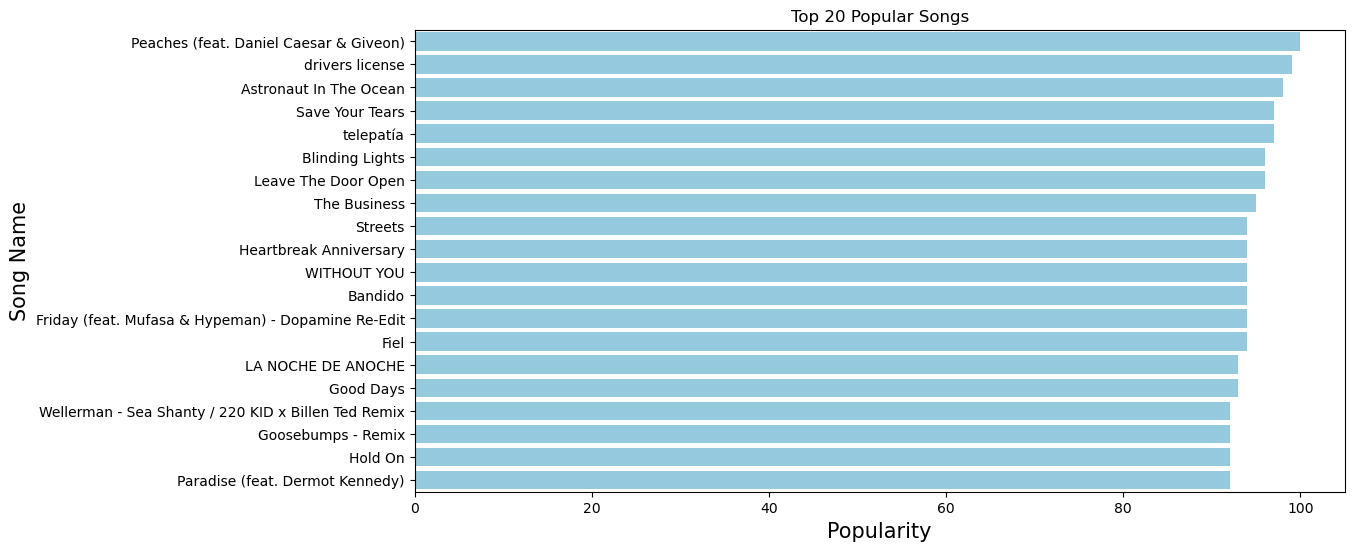

In [64]:
fig, ax = plt.subplots(figsize = (12, 6))
ax = sns.barplot(y= top_songs['track_name'], x = top_songs['popularity'], color='skyblue')
ax.set_xlabel("Popularity", fontsize = 15)
ax.set_ylabel("Song Name", fontsize = 15)
ax.set_title("Top 20 Popular Songs")
plt.show()

#### Top 10 danceability songs

In [65]:
most_dance = df_tracks.sort_values(by = 'danceability', ascending = False).head(10)
most_dance

,id,track_name,popularity,duration,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
418558,4tq7Q9bTkLqzXNUi8PVmk2,Puisorul cafeniu,15,85,0,Malina Olinescu,['6KZH1ER38F5smKpXKmLRwb'],2002-01-01,0.991,0.422,0,-11.093,1,0.2470,0.307000,0.017600,0.0788,0.994,119.975,4
156664,5ObMLQkrprMky3fuOCnFmW,Who Loves The Sun feat. Jo.Ke - Edit,53,257,0,"Nu, Jo.Ke","['5tY2sa8I11tpMuhU9onQ6e', '0RKP3F2s1SHvGpckHu...",2011-07-12,0.988,0.644,10,-10.245,0,0.0720,0.118000,0.462000,0.2440,0.499,120.003,4
252256,7yCtSls77Pnz8R4etGfHe5,Tío Mario,11,102,0,Susana Bosch,['7FSDwf9FSxPM0TnnbuBRUi'],1998-07-01,0.988,0.459,7,-6.631,1,0.1300,0.124000,0.000000,0.0749,0.930,114.849,4
62569,5YIF6HSOtHN9HdcE5IPzMe,Funky Cold Medina,58,248,0,Tone-Loc,['5Y8EphH8Vdqu5SLj6K5vjj'],1989-01-01,0.988,0.633,5,-15.012,0,0.0888,0.075500,0.000002,0.0668,0.929,117.493,4
356102,5GFwJHucflHj46Hwet6qvc,Cool - Leonardo La Mark Remix,0,362,0,"Spooner Street, Rio Dela Duna, Leonardo La Mark","['69Jnii2nKzGXwTz2CNR82H', '5McLuoTfnILw7AYs1I...",2021-01-15,0.987,0.649,9,-6.727,1,0.2770,0.000626,0.379000,0.0686,0.458,122.002,4
74928,6G7Gtq7ymFvYuqcJSAW9cA,New Year (2021),0,42,0,"xxrichbeats, Egor4ik","['49FLHDHX5mD9Pbm6JwLujJ', '01KisSmrh9sNoIzqT6...",2021-01-20,0.987,0.293,9,-11.453,0,0.1990,0.003210,0.000010,0.1280,0.502,119.974,4
175899,1HTN2lX8X87qmMXTtI9FDL,Go Girl,54,230,1,"Pitbull, Trina, Young Bo","['0TnOYISbd1XYRBk9myaseg', '4PrinKSrmILmo0kERG...",2012-05-29,0.986,0.597,8,-6.809,1,0.3080,0.145000,0.000002,0.1970,0.761,115.004,4
509977,3jjfgpQ05jy0hoGwdaVmzH,BABÁM,40,194,0,"Horváth Tamás, Pixa","['4I1y8Rd0H2NGXMzmT6JWsz', '6YbKlFrkjKLYpC3PYy...",2020-06-10,0.986,0.323,1,-6.965,0,0.1070,0.018900,0.000284,0.0857,0.708,121.958,4
303940,1MgM0WDaoQ2A3bnIQTR6ty,Go Girl,55,230,1,"Pitbull, Trina, Young Bo","['0TnOYISbd1XYRBk9myaseg', '4PrinKSrmILmo0kERG...",2012-05-08,0.986,0.597,8,-6.809,1,0.3080,0.145000,0.000002,0.1970,0.761,115.004,4
56990,1JLU51CdgQhWWWokxrbOPM,Como uma onda - Zen-surfismo,45,201,0,Lulu Santos,['0A1oy7PC7fdzURgaLaWkL1'],1983-10-20,0.985,0.379,10,-11.910,0,0.1080,0.161000,0.895000,0.0983,0.889,116.477,4


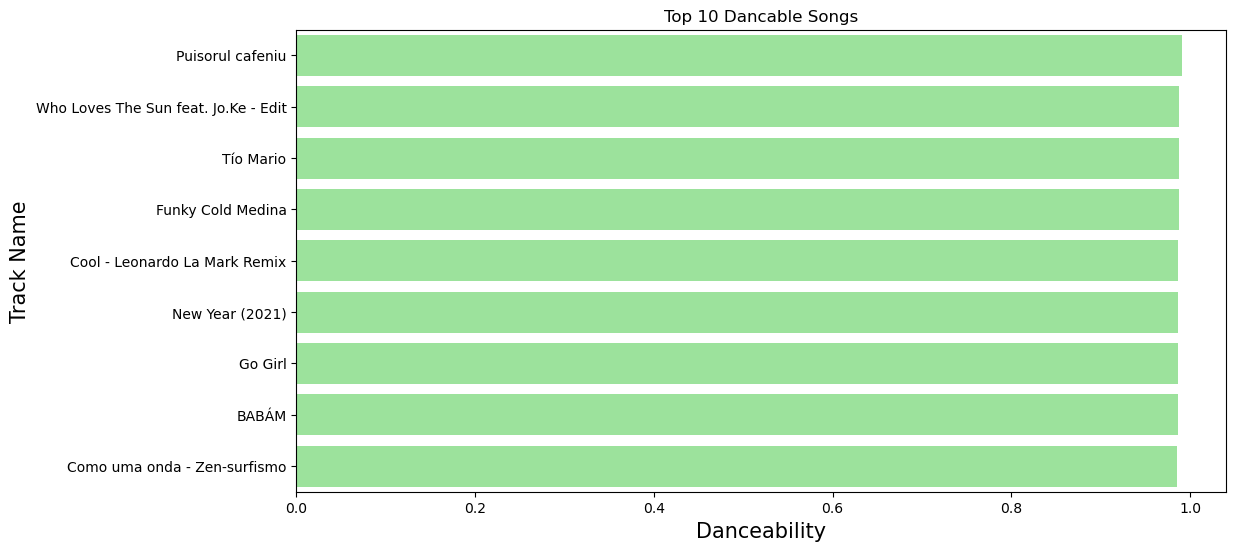

In [66]:
plt.figure(figsize = (12, 6))
sns.barplot(y = most_dance['track_name'], x = most_dance['danceability'], color = 'lightgreen')
plt.ylabel('Track Name', fontsize = 15)
plt.xlabel('Danceability', fontsize = 15)
plt.title("Top 10 Dancable Songs")
plt.show()

#### Top 10 energic songs

In [67]:
most_energy = df_tracks.sort_values(by = 'energy', ascending = False)[['track_name', 'energy', 'artists']].reset_index(drop = -1).head(10)

In [68]:
most_energy

,track_name,energy,artists
0,Aua im Kopf (Morgen sind wir schlauer...),1.0,Tobee
1,Numb The Pain (Mix Cut) - Original Mix,1.0,Will Atkinson
2,Suno Suno Tumhen Sunaye,1.0,K Dutta
3,Amnesia (Mix Cut) - SoundLift’s Emotional Take,1.0,"Running Man, SoundLift"
4,Amnesia (Mix Cut) - SoundLift’s Emotional Take,1.0,"Running Man, SoundLift"
5,Château D'amour,1.0,La Cream
6,Napalm Poet [Mix Cut] - Original Mix,1.0,Adam Ellis
7,"White Noise Rain(Loopable,No fade)",1.0,"Rain Sounds, Sleep Sounds of Nature, Zen Music..."
8,Lush Rain,1.0,Nataural
9,Ochtendgymnastiek,1.0,Samson & Gert


#### Distributions

In [69]:
#### Correlation Heatmap

In [70]:
corr_df = df_tracks.drop(['key', 'mode', 'explicit'], axis = 1).corr(method = 'pearson', numeric_only=True)
corr_df

,popularity,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,0.027683,0.187000,0.302315,0.327028,-0.047357,-0.370882,-0.236487,-0.048740,0.004643,0.071364,0.086759
duration,0.027683,1.000000,-0.120368,0.024828,0.000345,-0.125770,-0.064435,0.069271,0.002138,-0.163200,-0.001210,0.037554
danceability,0.187000,-0.120368,1.000000,0.241563,0.251436,0.199310,-0.242951,-0.225900,-0.106168,0.528150,-0.040783,0.146196
energy,0.302315,0.024828,0.241563,1.000000,0.764735,-0.053506,-0.715412,-0.195839,0.124632,0.372276,0.230099,0.188983
loudness,0.327028,0.000345,0.251436,0.764735,1.000000,-0.167112,-0.519423,-0.329306,0.029529,0.275448,0.189288,0.164377
speechiness,-0.047357,-0.125770,0.199310,-0.053506,-0.167112,1.000000,0.069060,-0.102440,0.207047,0.046501,-0.086911,-0.114171
acousticness,-0.370882,-0.064435,-0.242951,-0.715412,-0.519423,0.069060,1.000000,0.204412,-0.004738,-0.180939,-0.195235,-0.173927
instrumentalness,-0.236487,0.069271,-0.225900,-0.195839,-0.329306,-0.102440,0.204412,1.000000,-0.038848,-0.175226,-0.055477,-0.042257
liveness,-0.048740,0.002138,-0.106168,0.124632,0.029529,0.207047,-0.004738,-0.038848,1.000000,-0.000034,-0.014912,-0.024202
valence,0.004643,-0.163200,0.528150,0.372276,0.275448,0.046501,-0.180939,-0.175226,-0.000034,1.000000,0.135250,0.105529


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'duration'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'loudness'),
 Text(5.5, 0, 'speechiness'),
 Text(6.5, 0, 'acousticness'),
 Text(7.5, 0, 'instrumentalness'),
 Text(8.5, 0, 'liveness'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'tempo'),
 Text(11.5, 0, 'time_signature')]

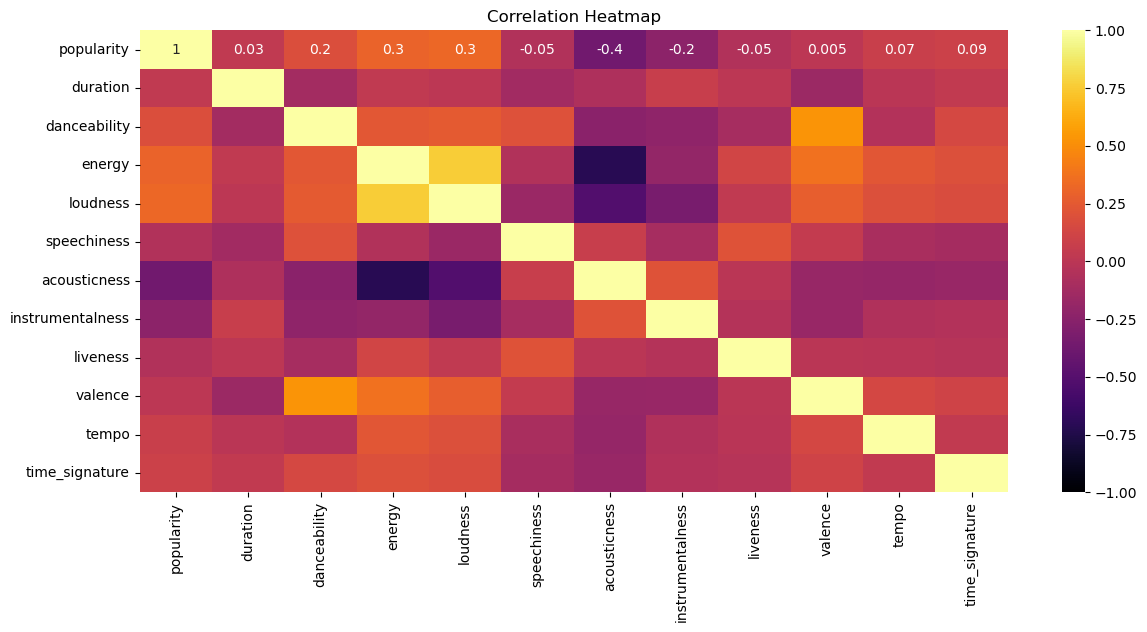

In [71]:
plt.figure(figsize = (14, 6))
ax = sns.heatmap(corr_df, annot = True, fmt=".1g", vmin = -1, vmax = 1, center = 0, cmap='inferno', linecolor='Black')
plt.title("Correlation Heatmap")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [72]:
sample_df = df_tracks.sample(int(0.004 * len(df_tracks)))

`sample` method in pandas to randomly select a fraction of rows from the DataFrame `df_tracks`.  
`0.004 * len(df_tracks)`: Calculates 0.4% of the total number of rows.  
 the code is creating a random sample (approximately 0.4% of the original size) of rows from the DataFrame df_tracks. This is commonly done to obtain a smaller, representative subset of data for analysis or exploration without having to work with the entire dataset.

In [73]:
len(sample_df)

2346

#### Loudness Vs. Energy Correlation

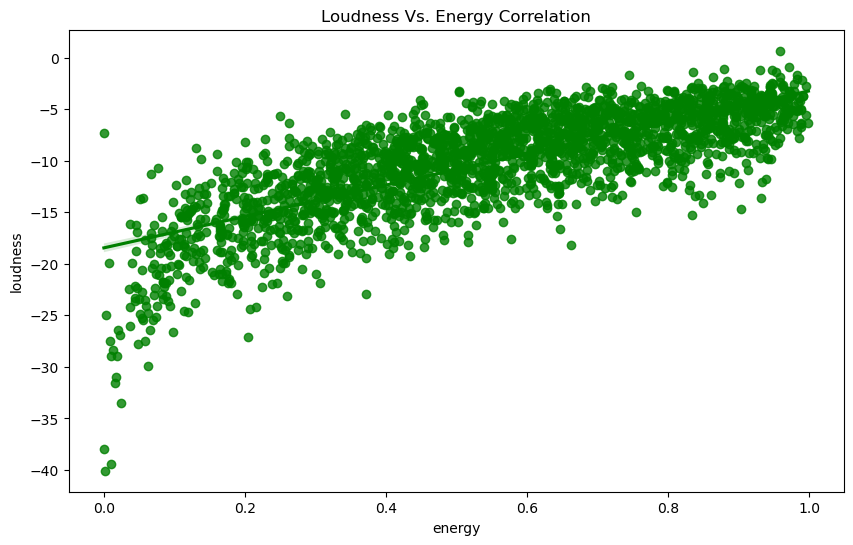

In [74]:
# regression plot for loudness vs energy
plt.figure(figsize = (10, 6))
sns.regplot(data = sample_df, y = "loudness", x = 'energy', color = 'g').set(title = "Loudness Vs. Energy Correlation")
plt.show()

#### Popularity Vs. Acousticness Correlation

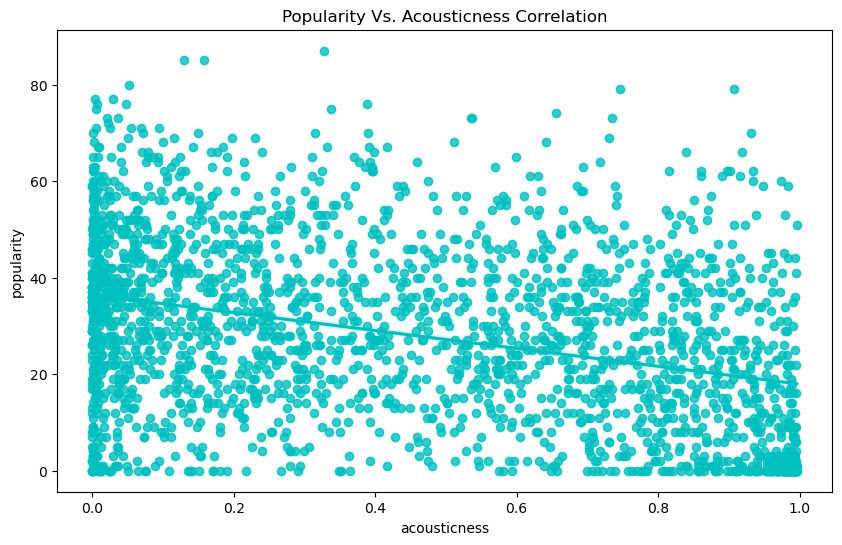

In [75]:
# regression plot 
plt.figure(figsize = (10, 6))
sns.regplot(data = sample_df, y = "popularity", x = 'acousticness', color = 'c').set(title = "Popularity Vs. Acousticness Correlation")
plt.show()

#### Duration Vs. Instrumentalness Correlation

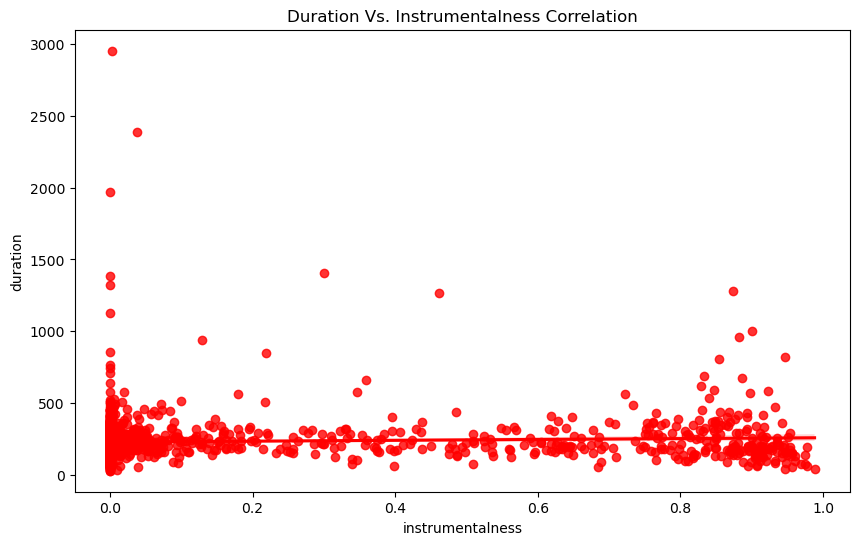

In [76]:
# regression plot 
plt.figure(figsize = (10, 6))
sns.regplot(data = sample_df, y = "duration", x = 'instrumentalness', color = 'r').set(title = "Duration Vs. Instrumentalness Correlation")
plt.show()

#### Number of songs per year distribution

In [77]:
years = df_tracks['release_date'].dt.year

G:\DATA SCIENCE FILES\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


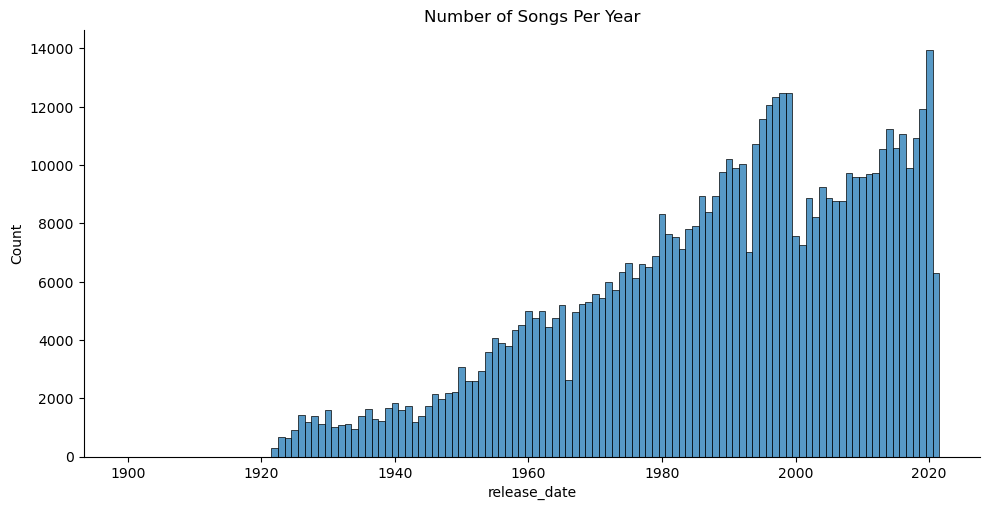

In [91]:
# songs distribution plot since 1922
sns.displot(years, discrete = True, aspect = 2, height = 5, kind = 'hist').set(title='Number of Songs Per Year')

#### Duration Vs Years

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 [Text(0, 0, '1900'),
  Text(1, 0, '1922'),
  Text(2, 0, '1923'),
  Text(3, 0, '1924'),
  Text(4, 0, '1925'),
  Text(5, 0, '1926'),
  Text(6, 0, '1927'),
  Text(7, 0, '1928'),
  Text(8, 0, '1929'),
  Text(9, 0, '1930'),
  Text(10, 0, '1931'),
  Text(11, 0, '1932'),
  Text(12, 0, '1933'),
  Text(13, 0, '1934'),
  Text(14, 0, '1935'),
  Text(15, 0, '1936'),
  Text(16, 0, '1937'),
  Text(17, 0, '1938'),
  Text(18, 0, '1939'),
  

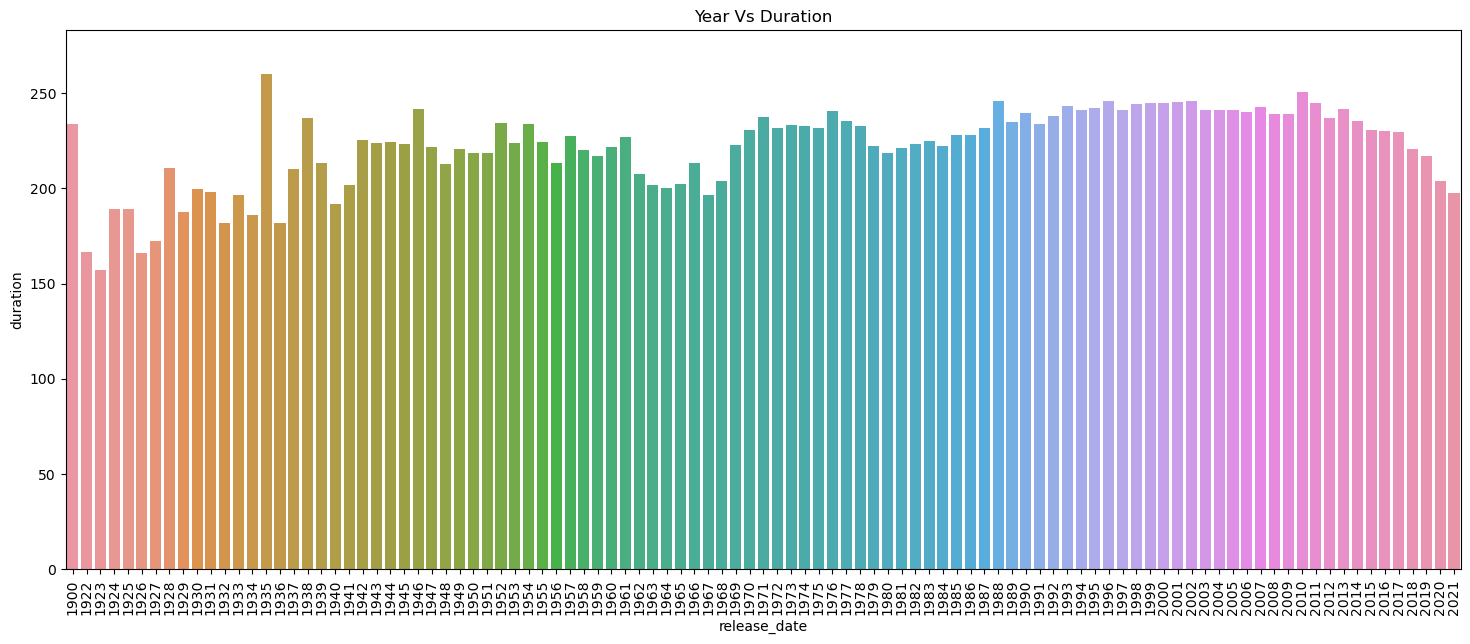

In [79]:
duration = df_tracks['duration']
fig_dims = (18, 7)
fig, ax = plt.subplots(figsize = fig_dims)
fig = sns.barplot(x = years, y = duration, ax = ax, errwidth = False).set(title="Year Vs Duration")
plt.xticks(rotation = 90)

#### Pairplot of `popularity`, `duration`, `danceability`, `energy`

G:\DATA SCIENCE FILES\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\DATA SCIENCE FILES\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\DATA SCIENCE FILES\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\DATA SCIENCE FILES\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

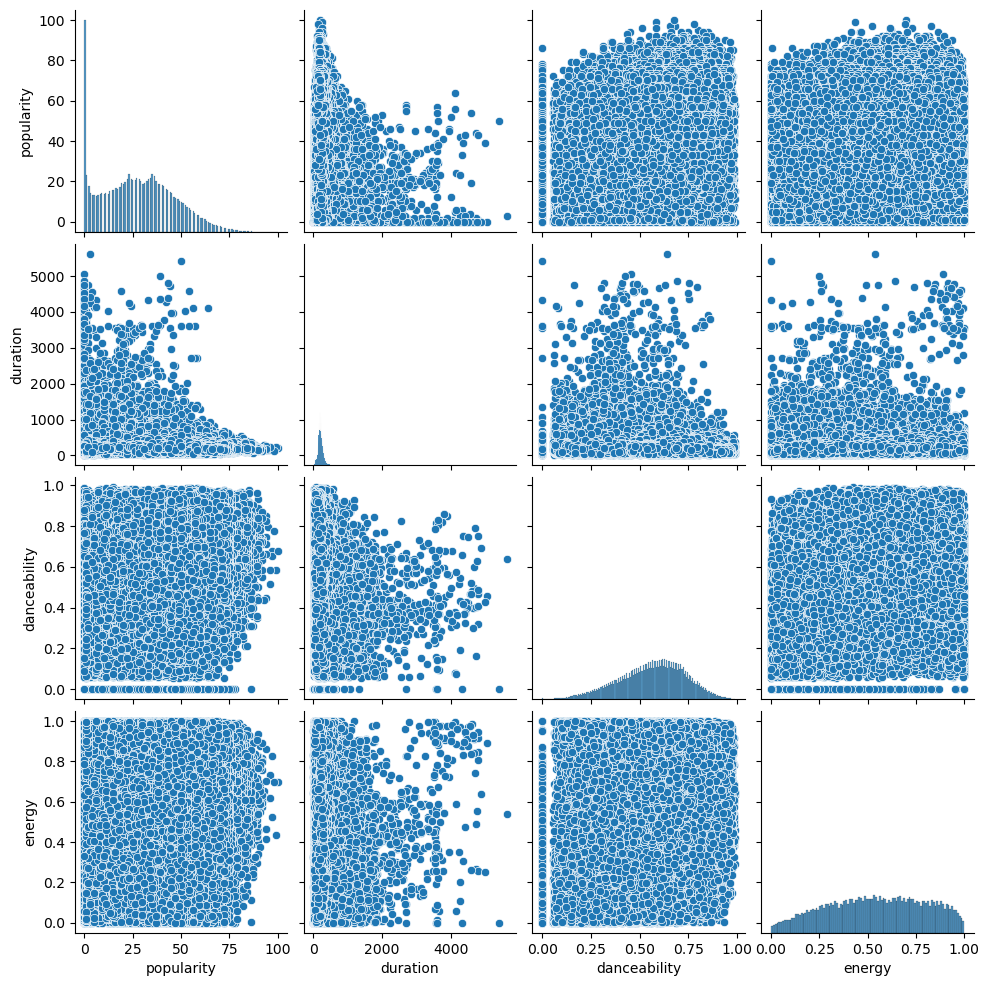

In [93]:
sns.pairplot(df_tracks[['popularity', 'duration', 'danceability', 'energy']])
plt.show()

G:\DATA SCIENCE FILES\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


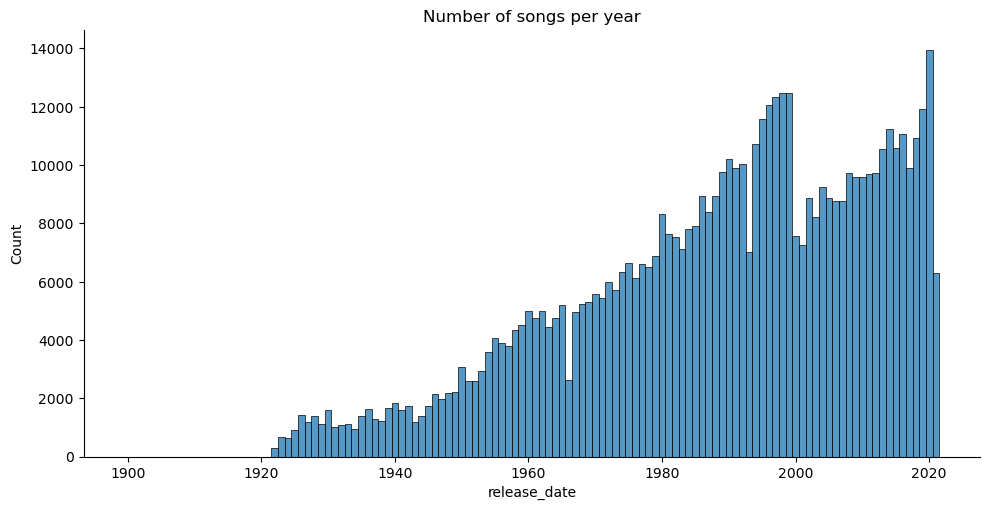

In [81]:
df_tracks.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.displot(years,discrete=True,aspect=2,height=5,kind='hist').set(title='Number of songs per year')

## Genre dataset


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# Reading Data Set 
df_genre= pd.read_csv(r'C:\Users\user\Desktop/SpotifyFeatures.csv')

In [84]:
df_genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [85]:
Popular_genre=df_genre[['genre', 'popularity']].sort_values(by="popularity",ascending=False)
Popular_genre=Popular_genre.drop_duplicates(subset = "popularity")
#Popular_genre=Popular_genre.head(25)
Popular_genre

,genre,popularity
9027,Dance,100
86951,Rap,99
66643,Hip-Hop,98
107829,Pop,97
107851,Pop,96
...,...,...
82389,Opera,4
105941,Opera,3
73135,Children's Music,2
74533,Children's Music,1


In [86]:
V=[]
for i in Popular_genre.genre.value_counts().index.tolist():
    c = Popular_genre[Popular_genre['genre'].str.contains(i)]['popularity'].sum()
    V.append(c)
 
#Initialize data
genre = Popular_genre.genre.value_counts().index.tolist()
popularity = V

# Create a pandas dataframe
pop_vs_genre_df = pd.DataFrame({"genre": genre,
                   "popularity": popularity})

In [87]:
pop_vs_genre_df.sort_values('popularity')

,genre,popularity
21,Children's Music,3
3,Opera,24
23,Soul,43
22,Indie,52
20,Soundtrack,56
15,Comedy,65
9,Anime,69
24,Folk,74
2,Movie,75
18,Jazz,89


#### Top Genres by Popularity


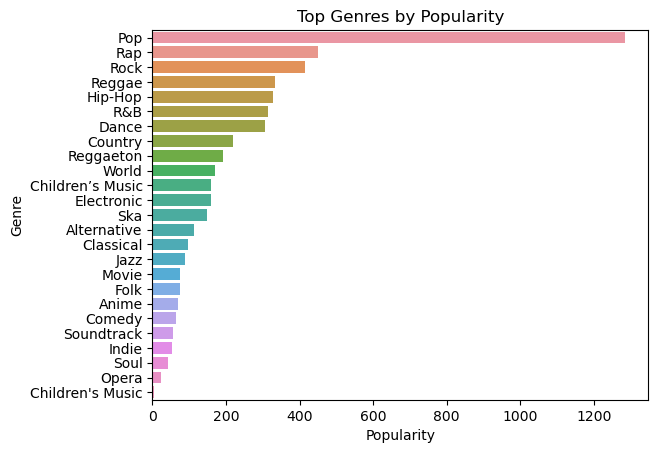

In [88]:
sns.barplot(y='genre',x='popularity',data=pop_vs_genre_df,order=pop_vs_genre_df.sort_values('popularity',ascending = False).genre).set(title='Top Genres by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Genre')
plt.show()

#### Duration of songs in different Genres


Text(0, 0.5, 'Genres')

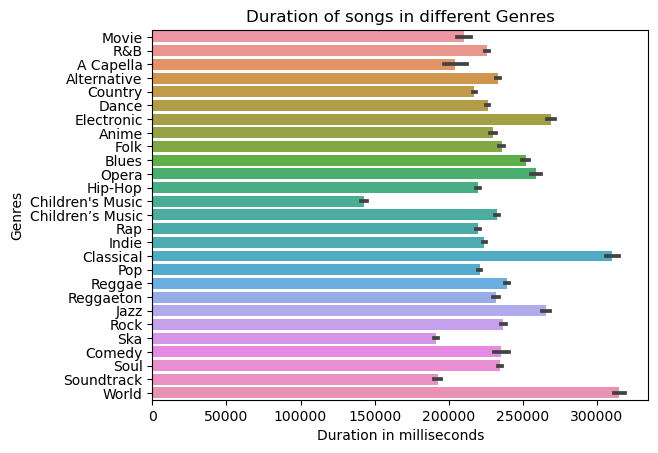

In [89]:
plt.title('Duration of songs in different Genres')
sns.color_palette('rocket', as_cmap=True)
sns.barplot(y='genre', x='duration_ms', data=df_genre)
plt.xlabel('Duration in milliseconds')
plt.ylabel('Genres')